**Loading libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from keras.layers import Input, Dense, Lambda, Subtract
from keras.models import Model
import keras.backend as K

mounting google drive to read data file

In [5]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


**converting csv file into pandas data frame**

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/big_student_clear_third_version.csv")
dataset.head()


,Unnamed: 0,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32


In [4]:
dataset.shape

(416921, 22)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         416921 non-null  int64  
 1   institute          416921 non-null  object 
 2   course_id          416921 non-null  object 
 3   year               416921 non-null  int64  
 4   semester           416921 non-null  object 
 5   userid_DI          416921 non-null  object 
 6   viewed             416921 non-null  int64  
 7   explored           416921 non-null  int64  
 8   certified          416921 non-null  int64  
 9   final_cc_cname_DI  416921 non-null  object 
 10  LoE_DI             416921 non-null  object 
 11  gender             393710 non-null  object 
 12  grade              416921 non-null  float64
 13  start_time_DI      416921 non-null  object 
 14  last_event_DI      416921 non-null  object 
 15  nevents            416921 non-null  int64  
 16  nd

In [ ]:
dataset["incomplete_flag"].value_counts()

0    404807
1     12114
Name: incomplete_flag, dtype: int64

<Axes: xlabel='incomplete_flag', ylabel='count'>

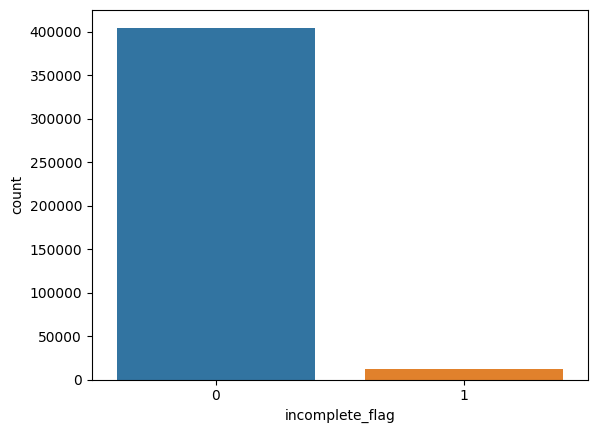

In [ ]:
sns.countplot(x=dataset["incomplete_flag"])

In [ ]:
dataset["institute"].value_counts()

MITx        240119
HarvardX    176802
Name: institute, dtype: int64

<Axes: xlabel='institute', ylabel='count'>

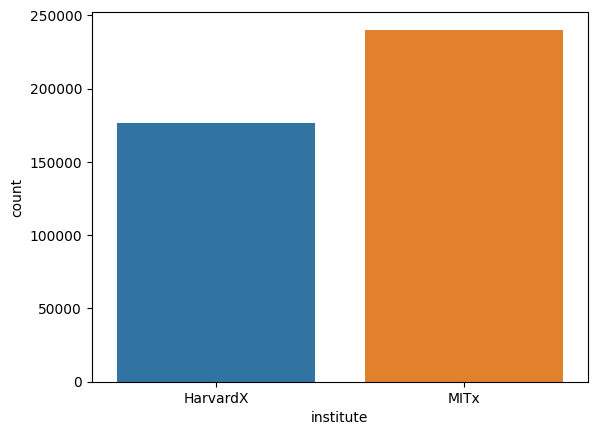

In [ ]:
sns.countplot(x=dataset["institute"])

In [ ]:
dataset["semester"].value_counts()

Spring    244746
Fall      152292
Summer     19883
Name: semester, dtype: int64

<Axes: xlabel='semester', ylabel='count'>

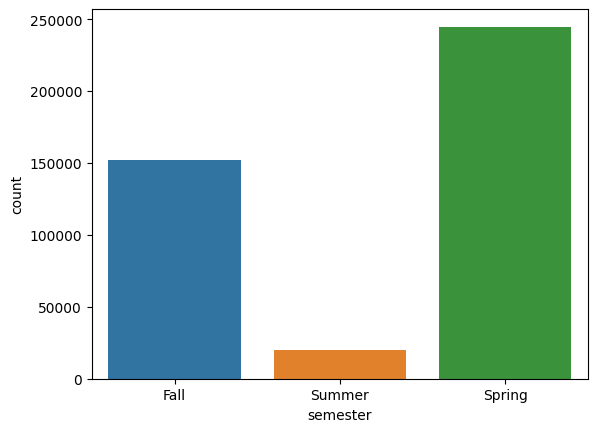

In [ ]:

sns.countplot(x=dataset["semester"])

In [ ]:
dataset["viewed"].value_counts()

1    296320
0    120601
Name: viewed, dtype: int64

<Axes: xlabel='viewed', ylabel='count'>

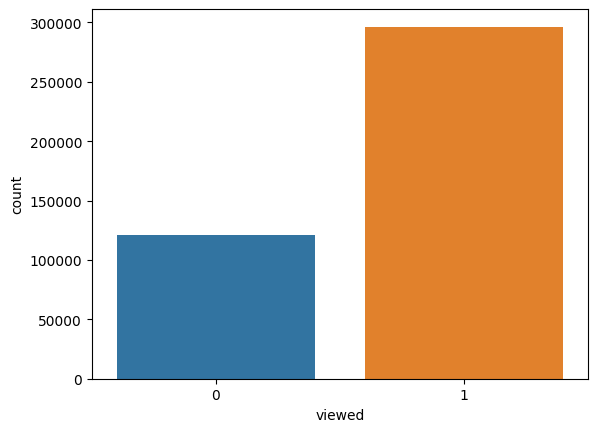

In [ ]:
sns.countplot(x=dataset["viewed"])

In [ ]:
dataset["explored"].value_counts()

0    384566
1     32355
Name: explored, dtype: int64

<Axes: xlabel='explored', ylabel='count'>

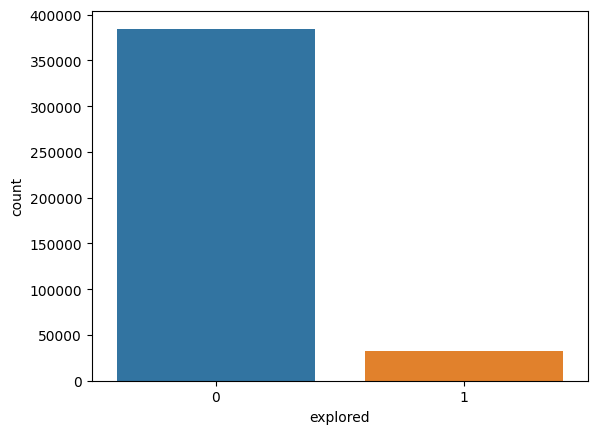

In [ ]:
sns.countplot(x=dataset["explored"])

In [ ]:
dataset["certified"].value_counts()

0    402032
1     14889
Name: certified, dtype: int64

<Axes: xlabel='certified', ylabel='count'>

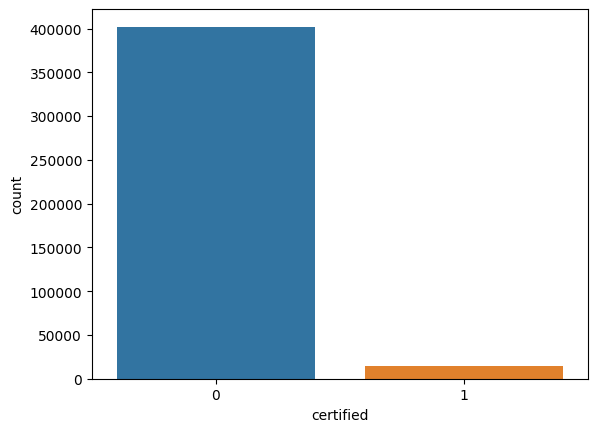

In [ ]:
sns.countplot(x=dataset["certified"])

In [ ]:
dataset["final_cc_cname_DI"].value_counts()

United States                             129648
India                                      70205
Other Europe                               30973
Other Africa                               18854
United Kingdom                             15708
Brazil                                     13787
Other Middle East/Central Asia             13641
Other South Asia                           10102
Canada                                      8404
Egypt                                       7493
Russian Federation                          7272
Spain                                       7244
Pakistan                                    6997
Other South America                         6678
Germany                                     6282
Nigeria                                     5392
Other East Asia                             5241
Unknown/Other                               4792
Australia                                   4429
China                                       4410
Poland              

<Axes: xlabel='final_cc_cname_DI', ylabel='count'>

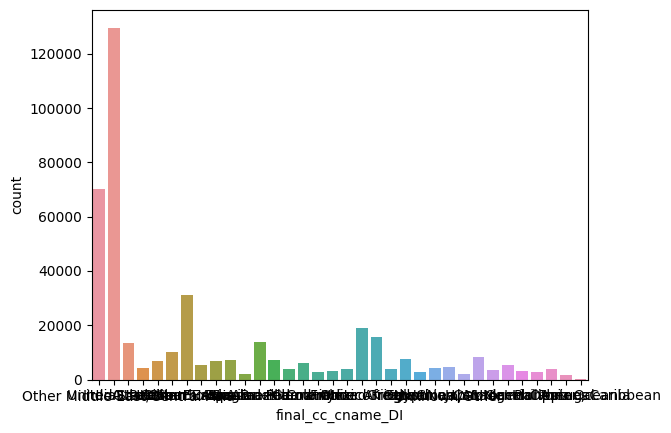

In [ ]:
sns.countplot(x=dataset["final_cc_cname_DI"])

In [ ]:
dataset["grade"].value_counts()

0.00    352600
0.01     17380
0.02      4757
0.03      4065
0.04      3487
         ...  
0.54       124
0.44       124
0.52       124
0.48       117
0.49       103
Name: grade, Length: 101, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

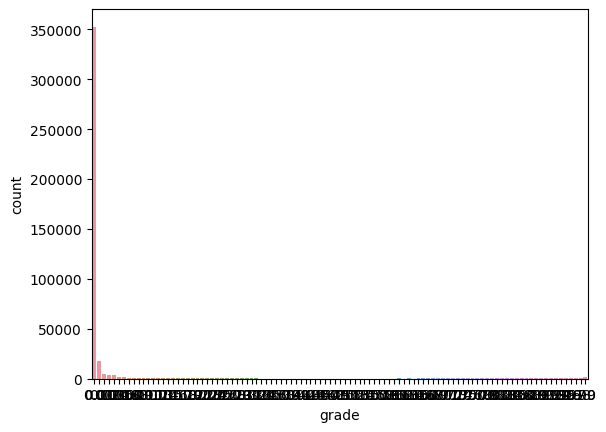

In [ ]:
sns.countplot(x=dataset["grade"])

In [ ]:
dataset["age"].value_counts()

25    35715
22    30982
23    30770
21    27987
20    26826
      ...  
10        8
82        6
79        5
9         4
2         4
Name: age, Length: 76, dtype: int64

<Axes: xlabel='age', ylabel='count'>

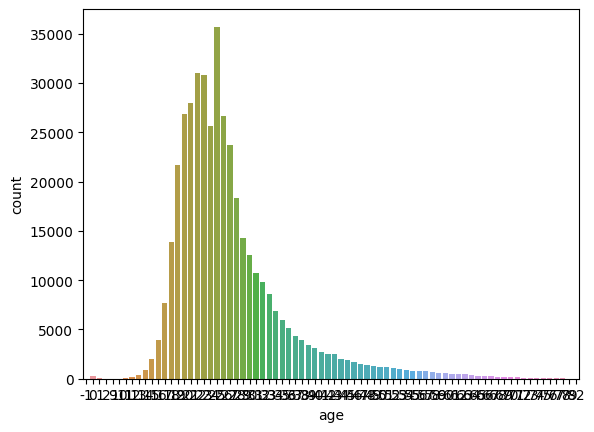

In [ ]:
sns.countplot(x=dataset["age"])

**columns name**

In [ ]:
dataset.columns

Index(['institute', 'course_id', 'semester', 'viewed', 'explored', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'gender', 'grade', 'start_time_DI',
       'last_event_DI', 'nevents', 'ndays_act', 'nplay_video', 'nchapters',
       'nforum_posts', 'incomplete_flag', 'age'],
      dtype='object')

**Null enteries**

In [ ]:
dataset.isnull().sum()

institute            0
course_id            0
semester             0
viewed               0
explored             0
certified            0
final_cc_cname_DI    0
LoE_DI               0
gender               0
grade                0
start_time_DI        0
last_event_DI        0
nevents              0
ndays_act            0
nplay_video          0
nchapters            0
nforum_posts         0
incomplete_flag      0
age                  0
dtype: int64

**checking repeated columns**

In [ ]:
dataset.columns.value_counts()

institute            1
start_time_DI        1
incomplete_flag      1
nforum_posts         1
nchapters            1
nplay_video          1
ndays_act            1
nevents              1
last_event_DI        1
grade                1
course_id            1
gender               1
LoE_DI               1
final_cc_cname_DI    1
certified            1
explored             1
viewed               1
semester             1
age                  1
dtype: int64

<Axes: title={'center': 'Top 30 conturies of users'}>

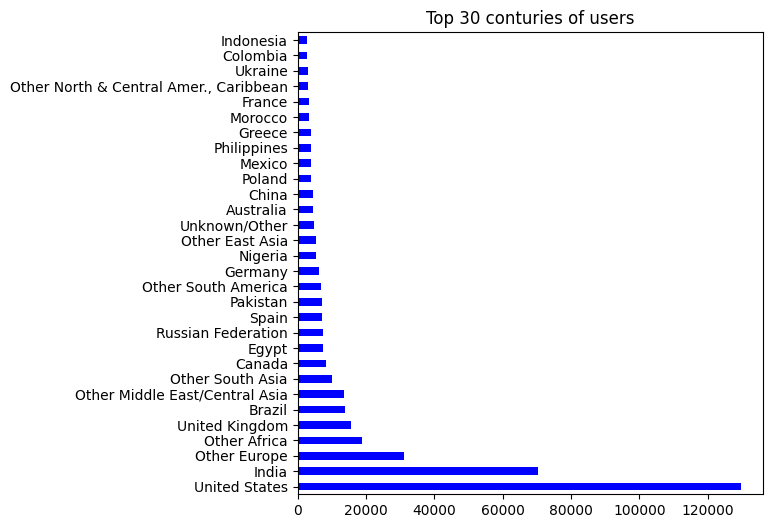

In [10]:
top_handles = dataset.final_cc_cname_DI.value_counts().sort_values(ascending=False)
top_handles.head(30).plot.barh(title='Top 30 conturies of users',
                               figsize=(6,6),color="blue")

<Axes: title={'center': 'Top 10 age group '}>

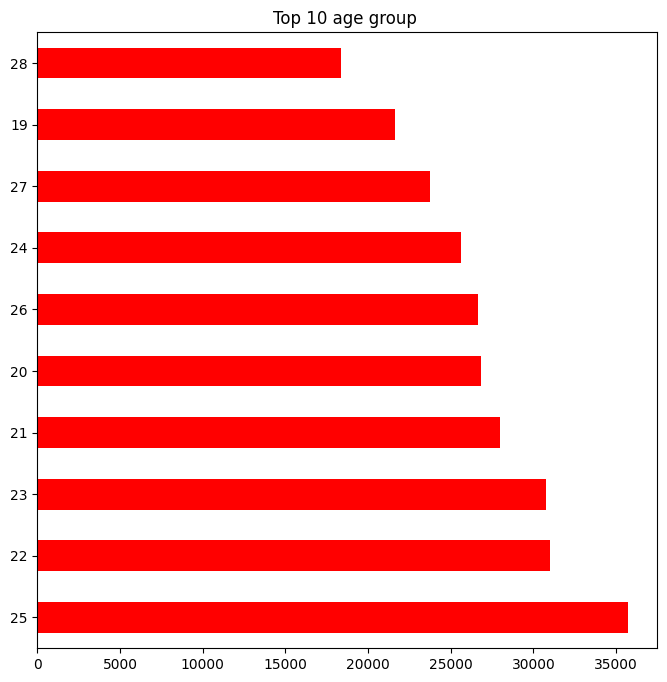

In [7]:
top_handles = dataset.age.value_counts().sort_values(ascending=False)
top_handles.head(10).plot.barh(title='Top 10 age group ',
                               figsize=(8,8),color="red")

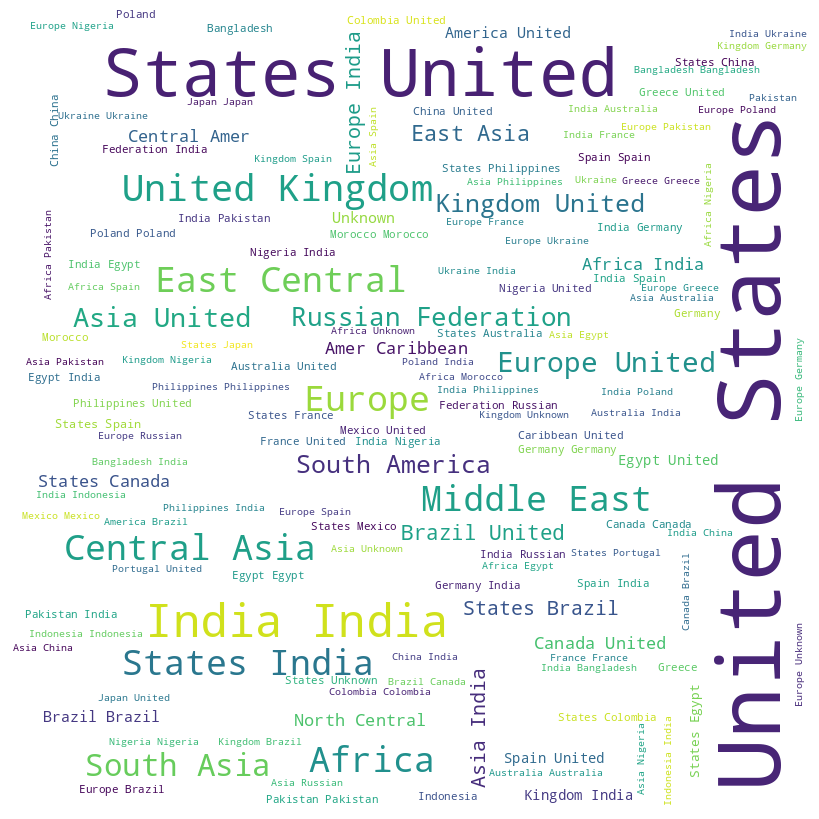

In [ ]:
text = ' '.join(dataset['final_cc_cname_DI'])
from wordcloud import WordCloud

# create a word cloud from the final_cc_cname_DI names
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**EDA**

In [ ]:
dataset.shape

(416921, 19)

In [ ]:
dataset.isnull()

,institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
416917,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
416918,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
416919,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   institute          416921 non-null  int64  
 1   course_id          416921 non-null  int64  
 2   semester           416921 non-null  int64  
 3   viewed             416921 non-null  int64  
 4   explored           416921 non-null  int64  
 5   certified          416921 non-null  int64  
 6   final_cc_cname_DI  416921 non-null  int64  
 7   LoE_DI             416921 non-null  int64  
 8   gender             416921 non-null  int64  
 9   grade              416921 non-null  float64
 10  start_time_DI      416921 non-null  int64  
 11  last_event_DI      416921 non-null  int64  
 12  nevents            416921 non-null  int64  
 13  ndays_act          416921 non-null  int64  
 14  nplay_video        416921 non-null  int64  
 15  nchapters          416921 non-null  int64  
 16  nf

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataset['course_id'] = label.fit_transform(dataset['course_id'])
dataset['userid_DI'] = label.fit_transform(dataset['userid_DI'])
dataset['semester'] = label.fit_transform(dataset['semester'])
dataset['institute'] = label.fit_transform(dataset['institute'])
dataset['LoE_DI'] = label.fit_transform(dataset['LoE_DI'])
dataset['last_event_DI'] = label.fit_transform(dataset['last_event_DI'])
dataset['start_time_DI'] = label.fit_transform(dataset['start_time_DI'])
dataset['final_cc_cname_DI'] = label.fit_transform(dataset['final_cc_cname_DI'])
dataset['gender'] = label.fit_transform(dataset['gender'])

In [15]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('year', axis=1, inplace=True)
dataset.drop('userid_DI', axis=1, inplace=True)



In [ ]:
dataset.head()

,institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,0,11,0,0,0,0,10,0,1,0.0,0,360,6,3,197757,0,0,0,23
1,0,11,0,1,0,0,32,4,1,0.0,0,149,107,8,7,2,0,0,19
2,0,9,2,1,0,0,32,0,1,0.0,0,239,8,1,197757,1,0,0,24
3,0,9,2,1,0,0,19,4,1,0.0,0,348,25,2,197757,4,0,0,20
4,0,11,0,0,0,0,0,3,0,0.0,0,32,3,2,197757,0,0,0,32


<Axes: xlabel='incomplete_flag', ylabel='institute'>

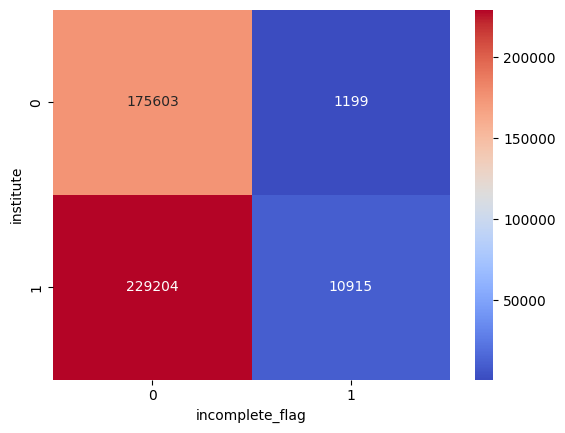

In [24]:


# Create a contingency table
cont_table = pd.crosstab(dataset['institute'], dataset['incomplete_flag'])

# Visualize the contingency table as a heatmap
sns.heatmap(cont_table, cmap='coolwarm', annot=True, fmt='d')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   institute          416921 non-null  int64  
 1   course_id          416921 non-null  int64  
 2   semester           416921 non-null  int64  
 3   viewed             416921 non-null  int64  
 4   explored           416921 non-null  int64  
 5   certified          416921 non-null  int64  
 6   final_cc_cname_DI  416921 non-null  int64  
 7   LoE_DI             416921 non-null  int64  
 8   gender             416921 non-null  int64  
 9   grade              416921 non-null  float64
 10  start_time_DI      416921 non-null  int64  
 11  last_event_DI      416921 non-null  int64  
 12  nevents            416921 non-null  int64  
 13  ndays_act          416921 non-null  int64  
 14  nplay_video        416921 non-null  int64  
 15  nchapters          416921 non-null  int64  
 16  nf

In [ ]:
classes = dataset['incomplete_flag'].copy()
features = dataset.drop(['incomplete_flag'], axis=1)

In [ ]:
features.head()

,institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age
0,0,11,0,0,0,0,10,0,1,0.0,0,360,6,3,197757,0,0,23
1,0,11,0,1,0,0,32,4,1,0.0,0,149,107,8,7,2,0,19
2,0,9,2,1,0,0,32,0,1,0.0,0,239,8,1,197757,1,0,24
3,0,9,2,1,0,0,19,4,1,0.0,0,348,25,2,197757,4,0,20
4,0,11,0,0,0,0,0,3,0,0.0,0,32,3,2,197757,0,0,32


In [ ]:
classes.head()

0    0
1    0
2    0
3    0
4    0
Name: incomplete_flag, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install deepctr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0


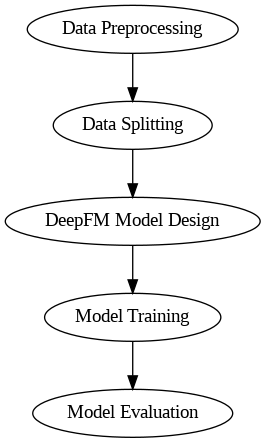

In [1]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph

# Create a directed graph
dot = Digraph(comment='DeepFM-Based Predictive Model for Student Dropout in Online Classes')

# Add nodes to the graph
dot.node('data_preprocessing', 'Data Preprocessing')
dot.node('data_splitting', 'Data Splitting')
dot.node('model_design', 'DeepFM Model Design')
dot.node('model_training', 'Model Training')
dot.node('model_evaluation', 'Model Evaluation')

# Add edges to the graph
dot.edge('data_preprocessing', 'data_splitting')
dot.edge('data_splitting', 'model_design')
dot.edge('model_design', 'model_training')
dot.edge('model_training', 'model_evaluation')

# Create a PydotPlus graph from the Digraph
graph = pydotplus.graph_from_dot_data(dot.source)

# Display the image of the graph
Image(graph.create_png())


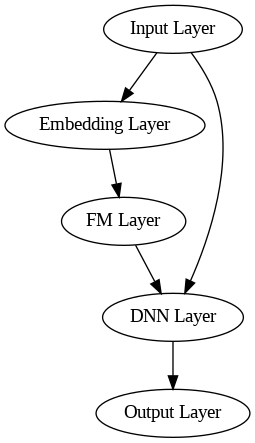

In [3]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph

# Create a directed graph
dot = Digraph(comment='DeepFM-Based Predictive Model')

# Add nodes to the graph
dot.node('input_layer', 'Input Layer')
dot.node('embedding_layer', 'Embedding Layer')
dot.node('fm_layer', 'FM Layer')
dot.node('dnn_layer', 'DNN Layer')
dot.node('output_layer', 'Output Layer')

# Add edges to the graph
dot.edge('input_layer', 'embedding_layer')
dot.edge('embedding_layer', 'fm_layer')
dot.edge('fm_layer', 'dnn_layer')
dot.edge('input_layer', 'dnn_layer')
dot.edge('dnn_layer', 'output_layer')

# Create a PydotPlus graph from the Digraph
graph = pydotplus.graph_from_dot_data(dot.source)

# Display the image of the graph
Image(graph.create_png())


In [ ]:
from deepctr.models import DeepFM

In [ ]:
from deepctr.feature_column import SparseFeat,DenseFeat, get_feature_names

In [ ]:
df = dataset
# separate the target variable (if applicable)
target = df['incomplete_flag']
df = df.drop('incomplete_flag', axis=1)
scaler = StandardScaler()
df=scaler.fit_transform(df)



In [ ]:
df = pd.DataFrame(data=df, columns=[f"PC{i+1}" for i in range(df.shape[1])])


In [ ]:
df['labels'] = target

In [ ]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,labels
0,-1.165386,1.363925,-1.221507,-1.567491,-0.290058,-0.192443,-0.993486,-1.069134,0.196373,-0.246904,-1.775383,1.297935,-0.274825,-0.205758,0.794734,-0.617920,-0.096669,-0.457300,0
1,-1.165386,1.363925,-1.221507,0.637962,-0.290058,-0.192443,1.098872,1.174042,0.196373,-0.246904,-1.775383,-0.712035,-0.199944,0.255424,-1.259329,-0.153171,-0.096669,-0.924624,0
2,-1.165386,0.789073,2.358460,0.637962,-0.290058,-0.192443,1.098872,-1.069134,0.196373,-0.246904,-1.775383,0.145298,-0.273342,-0.390230,0.794734,-0.385545,-0.096669,-0.340469,0
3,-1.165386,0.789073,2.358460,0.637962,-0.290058,-0.192443,-0.137521,1.174042,0.196373,-0.246904,-1.775383,1.183624,-0.260739,-0.297994,0.794734,0.311578,-0.096669,-0.807793,0
4,-1.165386,1.363925,-1.221507,-1.567491,-0.290058,-0.192443,-1.944558,0.613248,-1.297260,-0.246904,-1.775383,-1.826568,-0.277049,-0.297994,0.794734,-0.617920,-0.096669,0.594179,0


In [ ]:
target_col = 'labels'
feature_cols = df.columns.drop(target_col)

x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.9, random_state=42)


In [ ]:
dense_feats = [DenseFeat(feat, 1) for feat in x_train.select_dtypes('number').columns]
sparse_feats = [] 

In [ ]:
linear_cols = sparse_cols = dense_feats + sparse_feats
dnn_cols = dense_feats + sparse_feats

In [ ]:
train_data = {feat: x_train[feat].values.reshape(-1, 1) for feat in x_train.columns}
test_data = {feat: x_test[feat].values.reshape(-1, 1) for feat in x_test.columns}


In [ ]:
model = DeepFM(linear_cols, dnn_cols, task='binary')

# Compile the model
model.compile("adam", "binary_crossentropy", metrics=['accuracy'])


In [ ]:
features.head()

,institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age
0,0,11,0,0,0,0,10,0,1,0.0,0,360,6,3,197757,0,0,23
1,0,11,0,1,0,0,32,4,1,0.0,0,149,107,8,7,2,0,19
2,0,9,2,1,0,0,32,0,1,0.0,0,239,8,1,197757,1,0,24
3,0,9,2,1,0,0,19,4,1,0.0,0,348,25,2,197757,4,0,20
4,0,11,0,0,0,0,0,3,0,0.0,0,32,3,2,197757,0,0,32


In [ ]:
# Train the model
history = model.fit(train_data, y_train.values, batch_size=64, epochs=10, validation_data=(test_data, y_test.values))

Epoch 1/10
652/652 [==============================] - 44s 59ms/step - loss: 0.0716 - accuracy: 0.9739 - val_loss: 0.0395 - val_accuracy: 0.9858
Epoch 2/10
652/652 [==============================] - 23s 35ms/step - loss: 0.0354 - accuracy: 0.9869 - val_loss: 0.0284 - val_accuracy: 0.9903
Epoch 3/10
652/652 [==============================] - 24s 37ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 0.0230 - val_accuracy: 0.9923
Epoch 4/10
652/652 [==============================] - 24s 36ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0242 - val_accuracy: 0.9912
Epoch 5/10
652/652 [==============================] - 20s 30ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0185 - val_accuracy: 0.9938
Epoch 6/10
652/652 [==============================] - 19s 29ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 0.0200 - val_accuracy: 0.9935
Epoch 7/10
652/652 [==============================] - 24s 36ms/step - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.0205 - val_accuracy:

**Training and validation curves**

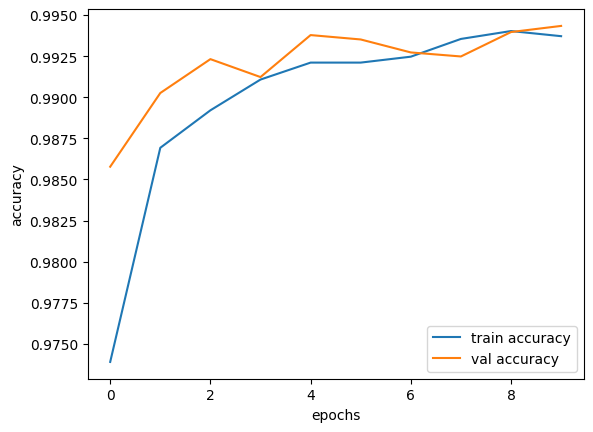

In [ ]:
epochs = list(range(10))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

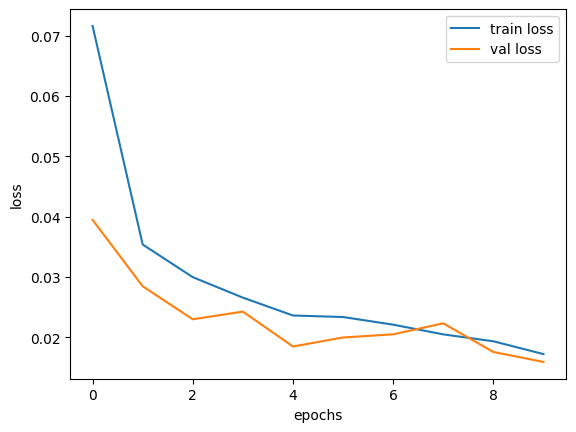

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Model evaluation**
evaluation metrics calcuation

In [ ]:
ypred=model.predict(test_data)

In [ ]:
ypred = (ypred>0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
accuracy_score(y_test.values, ypred)

0.9714547649568663

In [ ]:
from sklearn import metrics

In [ ]:
macro_averaged_precision = metrics.precision_score(y_test.values, ypred)
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.9290550485722696


In [ ]:
macro_averaged_recall = metrics.recall_score(y_test.values, ypred)
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.8711012972674579


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
macro_averaged_f1 = metrics.f1_score(y_test.values, ypred, average = 'micro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.9943394567051054


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

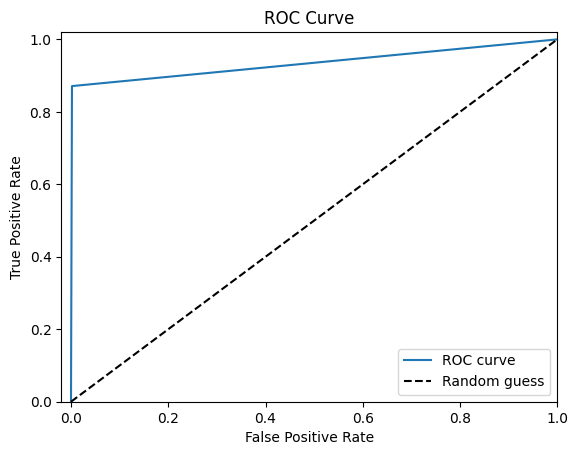

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test.values, ypred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

**confusion matrix**

<Axes: >

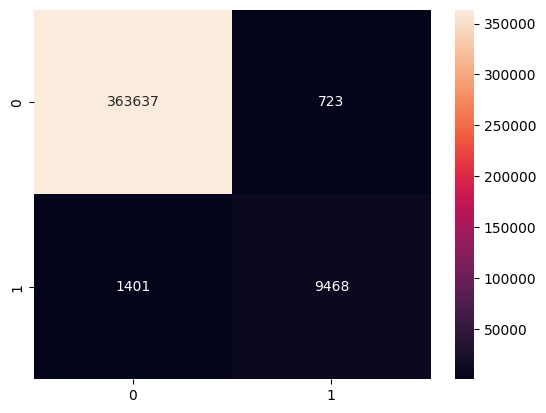

In [ ]:
cm = confusion_matrix(y_test.values, ypred)
sns.heatmap(cm, annot=True, fmt="d")

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

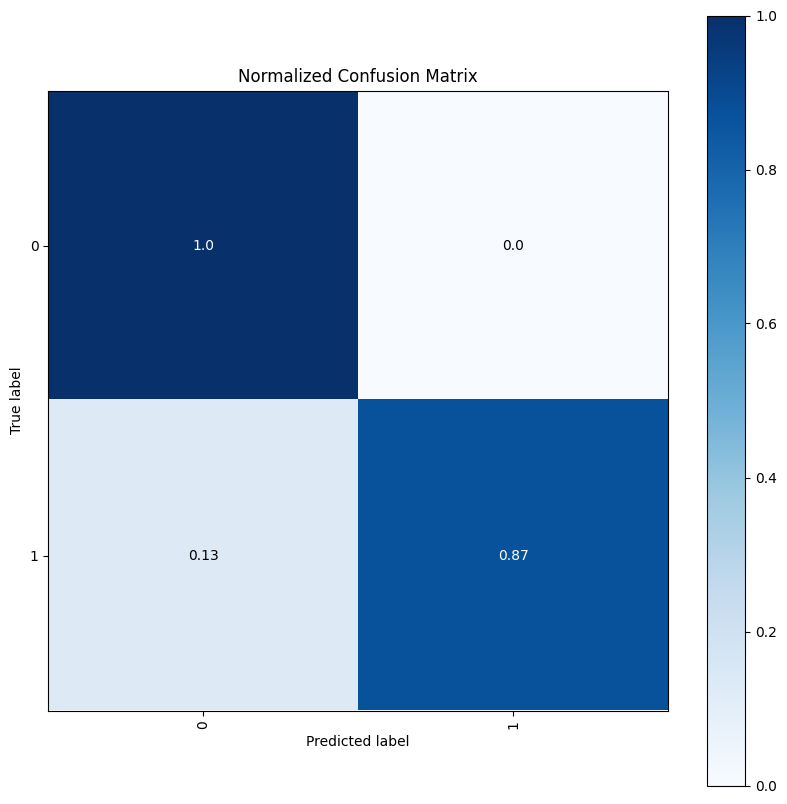

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(y_test.values, ypred,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')


